## The objective of the approach

**The document appears intends to guide research on virus-host interactions in the context of HSV-1 infection.**

* The paper describes the classification, life cycle, tropism and gene expression of HSV-1. 
* It also highlights specific research strategies, such as targeting host proteins involved in the immune response and selecting seed genes based on the pathways they target. 
* In addition, the paper suggests using databases of known drugs to identify potential therapeutic targets.

In [2]:
import pandas as pd
import os

project_path = os.path.dirname(os.getcwd())
host_pathogen_PPI = pd.read_excel(f"{project_path}/1_seed_gene_selection/data/preprocessed_data/hpidb_phisto_aggregated_interactome.xlsx")    
host_pathogen_PPI

,Pathogen_Uniprot_ID,Human_Uniprot_ID,Pathogen_Taxonomy_ID,Pathogen_Protein_Name,Human_Protein_Name,Experimental_Method,Pubmed_ID,source
0,B9VQD3,Q16666,10298,entrez gene/locuslink:2703429,entrez gene/locuslink:3428,psi-mi:MI:0004(affinity chromatography technol...,25693804,HPIDB
1,B9VQD4,Q16666,10298,entrez gene/locuslink:2703431,entrez gene/locuslink:3428,psi-mi:MI:0004(affinity chromatography technol...,25693804,HPIDB
2,B9VQG6,O94776,10299,B9VQG6_HHV1,MTA2_HUMAN,psi-mi:MI:0004(affinity chromatography technol...,20585571,PHISTO
3,B9VQG6,Q13547,10299,B9VQG6_HHV1,HDAC1_HUMAN,psi-mi:MI:0004(affinity chromatography technol...,20585571,PHISTO
4,B9VQJ7,K9JA46,10299,B9VQJ7_HHV1,K9JA46_HUMAN,psi-mi:MI:0676(tandem affinity purification),22810585,PHISTO
...,...,...,...,...,...,...,...,...
841,Q9J0X9,Q96SB4,10298,Q9J0X9_HHV1,SRPK1_HUMAN,psi-mi:MI:0006(anti bait coimmunoprecipitation...,12660167,PHISTO
842,Q9J0X9,Q99613,10298,Q9J0X9$ Q9J0X9_HHV1,EIF3C_HUMAN $ uniprotkb:Q99613,psi-mi:MI:0006(anti bait coimmunoprecipitation),15567442,HPIDB$ PHISTO
843,Q9QNF3,Q16666,10298,entrez gene/locuslink:2703365,entrez gene/locuslink:3428,psi-mi:MI:0004(affinity chromatography technol...,25693804,HPIDB
844,U5TQE9,Q13546,10298,U5TQE9_HHV1 $ U5TQE9,RIPK1_HUMAN $ uniprotkb:Q13546,psi-mi:MI:0007(anti tag coimmunoprecipitation),26559832,HPIDB$ PHISTO


In [3]:
virus_proteins = set(host_pathogen_PPI['Pathogen_Uniprot_ID'])
print("Number of unique virus proteins: ", len(virus_proteins)) 
pathogen_PPI = host_pathogen_PPI[host_pathogen_PPI['Pathogen_Uniprot_ID'].isin(virus_proteins)][['Pathogen_Uniprot_ID', 'Pathogen_Protein_Name']]
# drop duplicates according to pathogen protein ID
pathogen_PPI = pathogen_PPI.drop_duplicates(subset='Pathogen_Uniprot_ID')
pathogen_PPI

Number of unique virus proteins:  83


,Pathogen_Uniprot_ID,Pathogen_Protein_Name
0,B9VQD3,entrez gene/locuslink:2703429
1,B9VQD4,entrez gene/locuslink:2703431
2,B9VQG6,B9VQG6_HHV1
4,B9VQJ7,B9VQJ7_HHV1
30,D3YP88,D3YP88
...,...,...
820,Q25BY8,Q25BY8_HHV1
821,Q69091,Q69091$ GD_HHV11
823,Q9J0X9,Q9J0X9
843,Q9QNF3,entrez gene/locuslink:2703365


Now we take the functional characterization in the paper by M. Topf. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6594648/#pbio.3000316.s014
> S6 Table. Functional annotation for each protein in the reconstructed network. For each protein, the table contains the following information: UniProtKB identifier, ORF name, protein name, presence or absence in the mature virion, and manually curated summaries of cellular and virion location and biological processes in which the protein has been involved (if known). Also given are the sources of this latter annotation. In most cases this results from a combination of UniProtKB and GO records as well as manually reviewed literature; where appropriate, both PMIDs and the list of GO identifiers associated to the protein, are provided.

In [4]:
topf = pd.read_excel(f"{project_path}/2_seed_gene_refinement/data/raw_data/pbio.3000316.s013.xlsx")
topf_proteins = set(topf['UniProtKB ID'])
print("Number of unique proteins in the Topf paper: ", len(topf_proteins)   )   
topf

Number of unique proteins in the Topf paper:  68


,UniProtKB ID,ORF,Protein name,Annotation source,Summary CC annotation,Summary MF/BP annotation,Virion component,Gene Ontology IDs
0,O09800,"gN UL49.5, UL49A",Envelope glycoprotein N,UniProtKB|GO|18596102|23678175|25746210|26999189,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
1,O09802,US8.5,Protein US8.5,UniProtKB|GO|18596102,host nucleus,uncharacterised,non-virion,GO:0042025|GO:0044196
2,P03176,TK UL23,"Thymidine kinase, EC 2.7.1.21",UniProtKB|GO|18596102,virion tegument/host nucleus,replication,virion,GO:0000166|GO:0004797|GO:0005524|GO:0006230|GO...
3,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
4,P04289,UL11,Cytoplasmic envelopment protein 3,UniProtKB|GO|18596102,virion tegument/host cytoplasm,tegumentation/egress,virion,GO:0005515|GO:0009653|GO:0016020|GO:0019012|GO...
...,...,...,...,...,...,...,...,...
63,P10239,UL55,Tegument protein UL55,UniProtKB|GO|18596102,virion tegument,uncharacterised,virion,GO:0019012|GO:0019033|GO:0019058|GO:0042025|GO...
64,P10240,UL56,Protein UL56,UniProtKB|GO|18596102|20682038,virion tegument,uncharacterised,virion,NaN
65,P32888,TRX1 UL38,Triplex capsid protein 1,UniProtKB|GO|18596102,virion capsid/host nucleus,capsid assembly,virion,GO:0003677|GO:0019012|GO:0019028|GO:0019069|GO...
66,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...


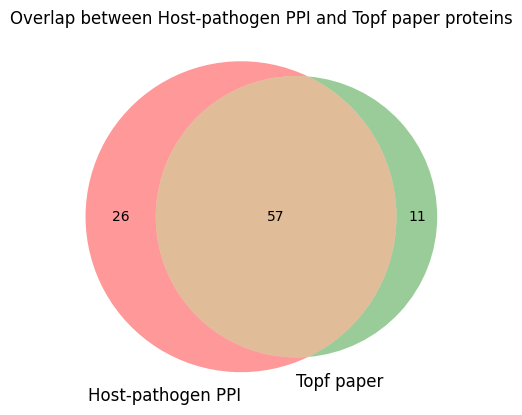

In [5]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Replace these with your actual counts
virus_proteins_count = len(virus_proteins)
topf_proteins_count = len(topf_proteins)
intersection_count = len(virus_proteins.intersection(topf_proteins))

# Create the Venn diagram
venn2(subsets=(virus_proteins_count - intersection_count, 
               topf_proteins_count - intersection_count, 
               intersection_count),
      set_labels=('Host-pathogen PPI', 'Topf paper'))

plt.title("Overlap between Host-pathogen PPI and Topf paper proteins")
plt.show()

## Option 1: take intersection between host-pathogen PPI and Topf paper
We can only categorize our proteins based on the information in the Topf paper. Thus, we can only use those as seed genes. 

In [6]:
commonseeds_mtopf_ppi=  host_pathogen_PPI.merge(topf, left_on='Pathogen_Uniprot_ID', right_on='UniProtKB ID', how='inner')
commonseeds_mtopf_ppi

,Pathogen_Uniprot_ID,Human_Uniprot_ID,Pathogen_Taxonomy_ID,Pathogen_Protein_Name,Human_Protein_Name,Experimental_Method,Pubmed_ID,source,UniProtKB ID,ORF,Protein name,Annotation source,Summary CC annotation,Summary MF/BP annotation,Virion component,Gene Ontology IDs
0,P04288,O43865,10299,P04288$ GM_HHV11,uniprotkb:O43865$ SAHH2_HUMAN,psi-mi:MI:0096(pull down)$ psi-mi:MI:0018(two ...,23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
1,P04288,P21673,10299,P04288$ GM_HHV11,SAT1_HUMAN $ uniprotkb:P21673,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
2,P04288,P41240,10299,P04288$ GM_HHV11,uniprotkb:P41240$ CSK_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
3,P04288,Q16666,10298,entrez gene/locuslink:2703379,entrez gene/locuslink:3428,psi-mi:MI:0004(affinity chromatography technol...,25693804,HPIDB,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
4,P04288,Q86SE5,10299,P04288$ GM_HHV11,uniprotkb:Q86SE5$ RALYL_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,P68331,Q9BRK4,10299,GK_HHV11 $ P68331,uniprotkb:Q9BRK4$ LZTS2_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...
700,P68331,Q9H0U9,10299,GK_HHV11 $ P68331,uniprotkb:Q9H0U9$ TSYL1_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...
701,P68331,Q9UKT9,10299,GK_HHV11 $ P68331,IKZF3_HUMAN $ uniprotkb:Q9UKT9,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...
702,Q69091,Q15223,10299,Q69091$ GD_HHV11,uniprotkb:Q15223$ NECT1_HUMAN,psi-mi:MI:0054(fluorescence-activated cell sor...,12011057$ 11277703$ 10683337,HPIDB$ PHISTO,Q69091,gD US6,"Envelope glycoprotein D, gD",UniProtKB|GO|18596102,virion envelope (g)/host membrane,viral entry into host cell,virion,GO:0005515|GO:0016020|GO:0016021|GO:0016032|GO...


## Extracting seeds based on MF/BP

In [7]:
commonseeds_mtopf_ppi['Summary MF/BP annotation'] = commonseeds_mtopf_ppi['Summary MF/BP annotation'].str.replace("tegumentation (primary envelopment/nuclear egress)", "tegumentation (primary envelopment and nuclear egress)")

print(commonseeds_mtopf_ppi['Summary MF/BP annotation'].value_counts())

# Create a new DataFrame with exploded BP_lifecycle
bps = commonseeds_mtopf_ppi.copy()
bps = bps.assign(BP_lifecycle=bps['Summary MF/BP annotation'].str.split('/')).explode('BP_lifecycle')
# Reset the index
bps = bps.reset_index(drop=True)

functional_groups = {
    'viral entry into host cell': 'Entry and Uncoating',
    'replication': 'Replication and Transcription',
    'transcription': 'Replication and Transcription',
    'capsid assembly': 'Assembly and Packaging',
    'dna packaging': 'Assembly and Packaging',
    'egress': 'Egress and Envelopment',
    'envelopment': 'Egress and Envelopment',
    'tegumentation': 'Egress and Envelopment',
    'tegumentation (secondary envelopment)': 'Egress and Envelopment',
    'tegumentation (primary envelopment and nuclear egress)': 'Egress and Envelopment',
    'evasion or tolerance by virus of host immune response': 'Immune Evasion',
    'uncharacterised': 'Uncharacterized'
}
# Assuming your data is in a pandas DataFrame called 'df' with a column 'original_category'
bps['BP_lifecycle'] = bps['BP_lifecycle'].map(functional_groups)
bps

Summary MF/BP annotation
replication                                                                                                174
evasion or tolerance by virus of host immune response                                                      166
tegumentation/egress                                                                                        67
viral entry into host cell                                                                                  57
tegumentation                                                                                               45
evasion or tolerance by virus of host immune response/tegumentation (secondary envelopment)/envelopment     38
tegumentation (secondary envelopment)/egress                                                                29
uncharacterised                                                                                             27
capsid assembly                                                                        

,Pathogen_Uniprot_ID,Human_Uniprot_ID,Pathogen_Taxonomy_ID,Pathogen_Protein_Name,Human_Protein_Name,Experimental_Method,Pubmed_ID,source,UniProtKB ID,ORF,Protein name,Annotation source,Summary CC annotation,Summary MF/BP annotation,Virion component,Gene Ontology IDs,BP_lifecycle
0,P04288,O43865,10299,P04288$ GM_HHV11,uniprotkb:O43865$ SAHH2_HUMAN,psi-mi:MI:0096(pull down)$ psi-mi:MI:0018(two ...,23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Egress and Envelopment
1,P04288,O43865,10299,P04288$ GM_HHV11,uniprotkb:O43865$ SAHH2_HUMAN,psi-mi:MI:0096(pull down)$ psi-mi:MI:0018(two ...,23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Entry and Uncoating
2,P04288,P21673,10299,P04288$ GM_HHV11,SAT1_HUMAN $ uniprotkb:P21673,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Egress and Envelopment
3,P04288,P21673,10299,P04288$ GM_HHV11,SAT1_HUMAN $ uniprotkb:P21673,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Entry and Uncoating
4,P04288,P41240,10299,P04288$ GM_HHV11,uniprotkb:P41240$ CSK_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Egress and Envelopment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,P68331,Q9BRK4,10299,GK_HHV11 $ P68331,uniprotkb:Q9BRK4$ LZTS2_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Egress and Envelopment
919,P68331,Q9H0U9,10299,GK_HHV11 $ P68331,uniprotkb:Q9H0U9$ TSYL1_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Egress and Envelopment
920,P68331,Q9UKT9,10299,GK_HHV11 $ P68331,IKZF3_HUMAN $ uniprotkb:Q9UKT9,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Egress and Envelopment
921,Q69091,Q15223,10299,Q69091$ GD_HHV11,uniprotkb:Q15223$ NECT1_HUMAN,psi-mi:MI:0054(fluorescence-activated cell sor...,12011057$ 11277703$ 10683337,HPIDB$ PHISTO,Q69091,gD US6,"Envelope glycoprotein D, gD",UniProtKB|GO|18596102,virion envelope (g)/host membrane,viral entry into host cell,virion,GO:0005515|GO:0016020|GO:0016021|GO:0016032|GO...,Entry and Uncoating


These groups can be consolidated into broader, more general processes that better represent the viral lifecycle stages.

This grouping reduces the number of categories from 16 to 7, making it easier to understand and analyze the main processes involved in the viral lifecycle. It also helps to highlight the major stages such as replication, assembly, entry, and egress, which are key points in the viral lifecycle that could be targeted for therapeutic intervention.


In [8]:
import pandas as pd
import os
import mygene

# Initialize MyGene
mg = mygene.MyGeneInfo()

# Set your working directory
workdir = f"{project_path}/2_seed_gene_refinement"

# Ensure the output directory exists
output_dir = f'{workdir}/data/categories/BP'
os.makedirs(output_dir, exist_ok=True)

# Continue with original BP-specific processing
for bp in bps['BP_lifecycle'].unique():
    print(f"Processing: {bp}")
    
    # Filter seed genes for this BP category
    seed_genes = set(bps[bps['BP_lifecycle']==bp]['Pathogen_Uniprot_ID'])
    print(f"Number of seed genes: {len(seed_genes)}")
    
    # Filter host-pathogen PPI data for these seed genes
    subdf = host_pathogen_PPI[host_pathogen_PPI['Pathogen_Uniprot_ID'].isin(seed_genes)]
    print(f"Number of PPIs: {len(subdf)}")
    
    # Sort by Rank and get unique Human_Uniprot_ID
    unique_humans = subdf.drop_duplicates(subset='Human_Uniprot_ID', keep='first')

    
    # Query MyGene for additional information
    human2entrez = mg.querymany(unique_humans['Human_Uniprot_ID'].tolist(), scopes='uniprot', 
                                fields='entrezgene, symbol, name', as_dataframe=True, species='human')
    
    # Filter out ribosomal proteins and entries without names
    human2entrez = human2entrez[~human2entrez['name'].str.contains("ribo", case=False, na=False)]
    human2entrez = human2entrez.dropna(subset=['name'])
    
    # Merge back with unique_humans
    unique_humans = pd.merge(unique_humans, human2entrez, left_on='Human_Uniprot_ID', right_index=True, how='inner')
    
    # Prepare filename
    filename = bp.replace(" ", "_") + ".csv"
    filepath = os.path.join(output_dir, filename)
    
    # Save to file
    unique_humans['Human_Uniprot_ID'].to_csv(filepath, index=False, header=False)
    print(f"Saved {len(unique_humans)} UniProt IDs to {filepath}")
    print()

print("Processing complete.")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Processing: Egress and Envelopment
Number of seed genes: 19
Number of PPIs: 236


1 input query terms found dup hits:	[('Q9BWG6', 2)]
5 input query terms found no hit:	['P01857', 'Q63ZY6', 'Q93065', 'Q96QB4', 'P0DN76']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 204 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Egress_and_Envelopment.csv

Processing: Entry and Uncoating
Number of seed genes: 6
Number of PPIs: 69


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 63 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Entry_and_Uncoating.csv

Processing: Uncharacterized
Number of seed genes: 6
Number of PPIs: 27


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 23 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Uncharacterized.csv

Processing: Replication and Transcription
Number of seed genes: 19
Number of PPIs: 190


1 input query terms found no hit:	['Q8N0V1']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 161 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Replication_and_Transcription.csv

Processing: Assembly and Packaging
Number of seed genes: 11
Number of PPIs: 51


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 44 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Assembly_and_Packaging.csv

Processing: Immune Evasion
Number of seed genes: 6
Number of PPIs: 204


12 input query terms found dup hits:	[('A4FTV9', 5), ('B2R4P9', 2), ('B2R4R0', 2), ('B2R4S9', 5), ('P04908', 2), ('P0C0S8', 5), ('P62805'
4 input query terms found no hit:	['B2R4W8', 'Q5VTE0', 'Q6NVV1', 'P01857']


Saved 160 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/BP/Immune_Evasion.csv

Processing complete.


## Extracting seeds based on CC

We can do the same with cellular components

In [9]:
print(commonseeds_mtopf_ppi['Summary CC annotation'].value_counts())


Summary CC annotation
host nucleus/host cytoplasm                         160
host nucleus                                        121
virion envelope (g)/host membrane                    79
virion envelope/host membrane                        66
virion tegument/host nucleus                         61
virion tegument                                      60
virion tegument/host cytoplasm                       36
virion envelope (g)/host membrane/host cytoplasm     34
virion tegument/host membrane                        30
virion capsid/host nucleus                           18
host membrane                                        16
virion capsid-associated/host nucleus                15
virion tegument/host nucleus/host cytoplasm           7
host cytoplasm/host nucleus                           1
Name: count, dtype: int64


In [10]:
grouping = {
    'host nucleus': 'Host Nucleus',
    'virion tegument/host nucleus': 'Host Nucleus',
    'virion capsid/host nucleus': 'Host Nucleus',
    'virion capsid-associated/host nucleus': 'Host Nucleus',
    'host nucleus/host cytoplasm': 'Host Nucleus',
    'host cytoplasm/host nucleus': 'Host Nucleus',
    'virion tegument/host nucleus/host cytoplasm': 'Host Cytoplasm',
    'virion tegument/host cytoplasm': 'Host Cytoplasm',
    'host membrane': 'Host Membrane',
    'virion envelope (g)/host membrane': 'Host Membrane',
    'virion envelope/host membrane': 'Host Membrane',
    'virion envelope (g)/host membrane/host cytoplasm': 'Host Membrane',
    'virion tegument/host membrane': 'Host Membrane',
    'virion tegument': 'Virion Components'
}

# Assuming your data is in a pandas DataFrame called 'df' with a column 'original_cc'
commonseeds_mtopf_ppi['CC_lifecycle'] = commonseeds_mtopf_ppi['Summary CC annotation'].map(grouping)
commonseeds_mtopf_ppi

,Pathogen_Uniprot_ID,Human_Uniprot_ID,Pathogen_Taxonomy_ID,Pathogen_Protein_Name,Human_Protein_Name,Experimental_Method,Pubmed_ID,source,UniProtKB ID,ORF,Protein name,Annotation source,Summary CC annotation,Summary MF/BP annotation,Virion component,Gene Ontology IDs,CC_lifecycle
0,P04288,O43865,10299,P04288$ GM_HHV11,uniprotkb:O43865$ SAHH2_HUMAN,psi-mi:MI:0096(pull down)$ psi-mi:MI:0018(two ...,23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Host Membrane
1,P04288,P21673,10299,P04288$ GM_HHV11,SAT1_HUMAN $ uniprotkb:P21673,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Host Membrane
2,P04288,P41240,10299,P04288$ GM_HHV11,uniprotkb:P41240$ CSK_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Host Membrane
3,P04288,Q16666,10298,entrez gene/locuslink:2703379,entrez gene/locuslink:3428,psi-mi:MI:0004(affinity chromatography technol...,25693804,HPIDB,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Host Membrane
4,P04288,Q86SE5,10299,P04288$ GM_HHV11,uniprotkb:Q86SE5$ RALYL_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P04288,gM UL10,"Envelope glycoprotein M, gM",UniProtKB|GO|18596102|23678175|25746210,virion envelope (g)/host membrane,tegumentation (secondary envelopment)/viral en...,virion,GO:0016020|GO:0016021|GO:0019012|GO:0019031|GO...,Host Membrane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,P68331,Q9BRK4,10299,GK_HHV11 $ P68331,uniprotkb:Q9BRK4$ LZTS2_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Host Membrane
700,P68331,Q9H0U9,10299,GK_HHV11 $ P68331,uniprotkb:Q9H0U9$ TSYL1_HUMAN,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Host Membrane
701,P68331,Q9UKT9,10299,GK_HHV11 $ P68331,IKZF3_HUMAN $ uniprotkb:Q9UKT9,psi-mi:MI:0018(two hybrid),23950709,HPIDB$ PHISTO,P68331,gK UL53,Envelope glycoprotein K (Syncytial protein),UniProtKB|GO|25746217,virion envelope (g)/host membrane,tegumentation (secondary envelopment),virion,GO:0005515|GO:0016020|GO:0016021|GO:0019076|GO...,Host Membrane
702,Q69091,Q15223,10299,Q69091$ GD_HHV11,uniprotkb:Q15223$ NECT1_HUMAN,psi-mi:MI:0054(fluorescence-activated cell sor...,12011057$ 11277703$ 10683337,HPIDB$ PHISTO,Q69091,gD US6,"Envelope glycoprotein D, gD",UniProtKB|GO|18596102,virion envelope (g)/host membrane,viral entry into host cell,virion,GO:0005515|GO:0016020|GO:0016021|GO:0016032|GO...,Host Membrane


In [11]:
import pandas as pd
import os
import mygene

# Initialize MyGene
mg = mygene.MyGeneInfo()

# Set your working directory
workdir = f"{project_path}/2_seed_gene_refinement"

# Ensure the output directory exists
output_dir = f'{workdir}/data/categories/CC'
os.makedirs(output_dir, exist_ok=True)

# Process each unique BP_lifecycle category
for bp in commonseeds_mtopf_ppi['CC_lifecycle'].unique():
    print(f"Processing: {bp}")

    # Filter seed genes for this BP category
    seed_genes = set(commonseeds_mtopf_ppi[commonseeds_mtopf_ppi['CC_lifecycle']==bp]['Pathogen_Uniprot_ID'])
    print(f"Number of seed genes: {len(seed_genes)}")

    # Filter host-pathogen PPI data for these seed genes
    subdf = host_pathogen_PPI[host_pathogen_PPI['Pathogen_Uniprot_ID'].isin(seed_genes)]
    print(f"Number of PPIs: {len(subdf)}")

    # Sort by Rank and get unique Human_Uniprot_ID
    unique_humans = subdf.drop_duplicates(subset='Human_Uniprot_ID', keep='first')

    # Query MyGene for additional information
    human2entrez = mg.querymany(unique_humans['Human_Uniprot_ID'].tolist(), scopes='uniprot', 
                                fields='entrezgene, symbol, name', as_dataframe=True, species='human')

    # Filter out ribosomal proteins and entries without names
    human2entrez = human2entrez[~human2entrez['name'].str.contains("ribo", case=False, na=False)]
    human2entrez = human2entrez.dropna(subset=['name'])

    # Merge back with unique_humans
    unique_humans = pd.merge(unique_humans, human2entrez, left_on='Human_Uniprot_ID', right_index=True, how='inner')

    # Prepare filename
    filename = bp.replace(" ", "_") + ".csv"
    filepath = os.path.join(output_dir, filename)

    # Save to file
    unique_humans['Human_Uniprot_ID'].to_csv(filepath, index=False, header=False)
    print(f"Saved {len(unique_humans)} UniProt IDs to {filepath}")
    print()

print("Processing complete.")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Processing: Host Membrane
Number of seed genes: 16
Number of PPIs: 225


1 input query terms found dup hits:	[('Q9BWG6', 2)]
4 input query terms found no hit:	['P01857', 'Q63ZY6', 'Q93065', 'Q96QB4']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 197 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/CC/Host_Membrane.csv

Processing: Host Nucleus
Number of seed genes: 28
Number of PPIs: 376


12 input query terms found dup hits:	[('A4FTV9', 5), ('B2R4P9', 2), ('B2R4R0', 2), ('B2R4S9', 5), ('P04908', 2), ('P0C0S8', 5), ('P62805'
4 input query terms found no hit:	['B2R4W8', 'Q5VTE0', 'Q6NVV1', 'Q8N0V1']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 303 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/CC/Host_Nucleus.csv

Processing: Host Cytoplasm
Number of seed genes: 4
Number of PPIs: 43


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Saved 41 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/CC/Host_Cytoplasm.csv

Processing: Virion Components
Number of seed genes: 9
Number of PPIs: 60


1 input query terms found no hit:	['P0DN76']


Saved 51 UniProt IDs to /home/bbc8731/HSV_final/2_seed_gene_refinement/data/categories/CC/Virion_Components.csv

Processing complete.
